In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from utility import analysis_parameters as ap
import numpy as np
import dask
# from dask.diagnostics import ProgressBar
# pbar = ProgressBar()
# pbar.register()

model="SHiELD"
region='TWP'
chunk_dict = {"lat":100, "lon":100, "latitude":100, "longitude":100, "Xdim":2400}
plt.rcParams["font.size"]=14
colors = ap.COLORS

In [3]:
# plt.rcParams

In [1]:
# ds = xr.open_dataset(ap.TWP+"DARDAR-CLOUD_v2.1.1_ALL_FEB_DATA.nc")
# dscf = ds.iwc.where(ds.iwc==0,other=1).groupby(ds.time.dt.year).mean()
# dscf_min = dscf.min(axis=0)
# dscf_max = dscf.max(axis=0)
# dscf_min.plot(y='z', color='k', lw=4)
# dscf_max.plot(y='z', color='k', lw=4)
# dscf.plot.line(y='z')
# plt.show()

## Histogram of OLR and IWP in TWP region for each model

In [3]:
model="SHiELD"
# load iwp and olr
iwp = ap.load_iwp(model, region, total=True, chunks=chunk_dict)
olr = ap.load_olr(model, region, r=0)
print(iwp.shape, olr.shape)
olr

returned ice + snow + graupel SHiELD TWP
(2880, 110626) (2880, 110626)


<xarray.DataArray 'rlut' (time: 2880, Xdim: 110626)>
dask.array<open_dataset-7fcce5ee754525c4c5afc70bb3dec23erlut, shape=(2880, 110626), dtype=float32, chunksize=(500, 1000), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-30T00:15:00 ... 2020-02-29
    lon      (Xdim) float32 dask.array<chunksize=(1000,), meta=np.ndarray>
    lat      (Xdim) float32 dask.array<chunksize=(1000,), meta=np.ndarray>
Dimensions without coordinates: Xdim
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      top of atmos upward longwave flux [W/m**2]
    units:          W m-2
    CDI_grid_type:  unstructured
    cell_methods:   time: point

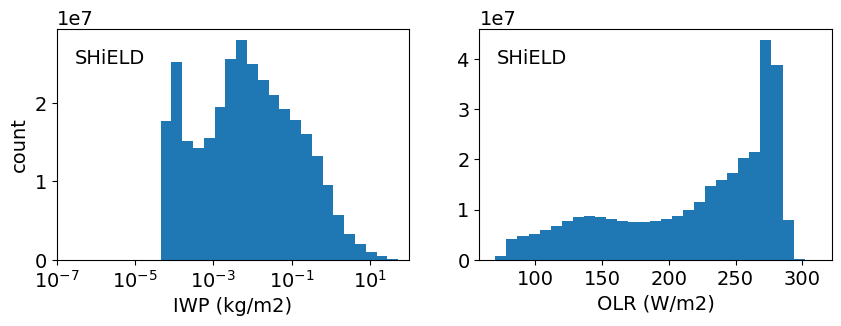

In [18]:
# calculate histograms & plot!
fig, ax = plt.subplots(1,2,figsize=(10,3))
iwp.plot.hist(bins=np.logspace(-6,2,30), ax=ax[0])
olr.plot.hist(bins=np.linspace(70,310,30), ax=ax[1])
ax[0].set(xlabel="IWP (kg/m2)", ylabel="count", xscale="log", xlim=[1e-7,1e2])
ax[1].set(xlabel="OLR (W/m2)", ylabel="")
ax[0].annotate(model, xy=(0.05,0.85), xycoords="axes fraction")
ax[1].annotate(model, xy=(0.05,0.85), xycoords="axes fraction")
plt.savefig("../plots/TWP/TWP_hist_iwp_olr_{}_count.png".format(model), 
            dpi=150, bbox_inches="tight", pad_inches=0.2)
plt.show()

## vertical profiles of cloud fraction and IWC

In [3]:
# add in observations - CCCM
# ds = xr.open_dataset("/work/bb1153/b380883/TWP/CERES_CCCM_JAS_2007-2011.nc")
# ds = ds["Mean_CALIPSO_5_km_cloud_layer_top_height"].groupby(ds.time.dt.year)
# fig, ax = plt.subplots(1,1)
# ds[2007].plot.hist(bins=np.linspace(0,20,20), density=1, histtype="step", ax=ax, label="2007")
# ds[2008].plot.hist(bins=np.linspace(0,20,20), density=1, histtype="step", ax=ax, label="2008")
# ds[2009].plot.hist(bins=np.linspace(0,20,20), density=1, histtype="step", ax=ax, label="2009")
# ds[2010].plot.hist(bins=np.linspace(0,20,20), density=1, histtype="step", ax=ax, label="2010")
# plt.legend(loc=2)
# plt.show()
# plot.hist(bins=np.arange(0,21,1))
# ds["Cloud fraction (CALIPSO-CloudSat)"].groupby(ds.time.dt.year).mean()

# cltotal_dict["CCCM_DY2"] = (ds["iwc used in CERES radiation, avg over cloudy part of CERES footprint"]+\
#                         ds["lwc used in CERES radiation, avg over cloudy part of CERES footprint"]).mean(axis=0)/1000
# models2=["CCCM_DY2"]+models2
# z_dict["CCCM_DY2"] = ds.alt*1000
# print("CCCM_DY2", cltotal_dict["CCCM_DY2"].shape, cl_dict["CCCM_DY2"].shape, z_dict["CCCM_DY2"].shape)
# print("... done observations DY2")

In [4]:
# # # add in obs from DARDAR Feb
# # ds = xr.open_dataset(ap.TWP+"DARDAR-CLOUD_v2.1.1_ALL_FEB_DATA.nc")
# # ds.iwc.groupby(ds.time.dt.year).mean().plot.line(y="z")
# # ds.iwc.groupby(ds.time.dt.year).mean().min(axis=0).plot.line(y="z", label="min")
# # ds.iwc.groupby(ds.time.dt.year).mean().max(axis=0).plot.line(y="z", label="max")
# # plt.legend()
# # plt.show()
# cltotal_dict={}
# cl_dict={}
# z_dict={}
# ds = xr.open_dataset(ap.TWP+"DARDAR-CLOUD_v2.1.1_ALL_FEB_DATA.nc")
# dardar = (ds.iwc).groupby(ds.time.dt.year).mean()
# cltotal_dict["DARDAR_DY2low"] = dardar.min(axis=0)
# cltotal_dict["DARDAR_DY2hgh"] = dardar.max(axis=0)
# z_dict["DARDAR_DY2"] = dardar.z
# print("DARDAR_DY2", cltotal_dict["DARDAR_DY2low"].shape, z_dict["DARDAR_DY2"].shape)
# ds = xr.open_dataset(ap.CCCM_JFM)['Mean_CALIPSO_5_km_cloud_layer_top_height'].mean(dim='Cloud_5K_Layers')
# z = np.arange(0,20,0.5)
# hist, _ = np.histogram(ds, bins=z)
# hist = hist/len(ds)*10
# print(len(ds))
# cl_dict["CCCM_DY2"] = hist
# z_dict["CCCM_DY2"] = z
# print("CCCM_DY2", cl_dict["CCCM_DY2"].shape, z_dict["CCCM_DY2"].shape)
# fig, [ax, axt] = plt.subplots(1,2, sharey=True)
# ax.plot(cl_dict["CCCM_DY2"], z_dict["CCCM_DY2"][:-1],
#                  color=colors['OBS'], alpha=0.5)
# n=80
# axt.fill_betweenx((z_dict["DARDAR_DY2"]/1000)[n:], cltotal_dict["DARDAR_DY2low"][n:],cltotal_dict["DARDAR_DY2hgh"][n:],
#                  color=colors['OBS'], alpha=0.2)
# ax.set(xlim=[-0.05,0.8], ylim=[0,20], ylabel="km")
# axt.set(xlim=[5e-4,2e-1], xscale="log", ylim=[0, 20])
# plt.show()

In [39]:
# twc = xr.open_dataset(ap.DY1+"TWP/TWP_ICON_xyt_qi_profile_20160801-20160910.nc").NEW
# cld = xr.open_dataset(ap.DY1+"TWP/TWP_ICON_cldfrac_profile_20160810-20160910.nc")["cldfrac"]

# print(twc.shape, cld.shape)
xr.open_dataset(ap.DY1+"TWP/ICON_xyt_mean_twc_TWP.nc").iwc, xr.open_dataset(ap.DY1+"TWP/ICON_cldfrac_TWP.nc").iwc

(<xarray.DataArray 'iwc' (time: 1, lat: 1, lon: 1)>
 [1 values with dtype=float32]
 Coordinates:
   * time     (time) datetime64[ns] 2016-08-21T10:30:00
   * lon      (lon) float64 0.0
   * lat      (lat) float64 0.0
 Attributes:
     standard_name:  iwc
     long_name:      ice_water_content
     units:          kg/m3,
 <xarray.DataArray 'iwc' (time: 1, lev: 77, cell: 195442)>
 [15049034 values with dtype=float32]
 Coordinates:
   * time     (time) datetime64[ns] 2016-08-21T10:30:00
   * cell     (cell) float64 0.0 1.0 2.0 3.0 ... 1.954e+05 1.954e+05 1.954e+05
   * lev      (lev) float64 14.5 15.5 16.5 17.5 18.5 ... 86.5 87.5 88.5 89.5 90.5
 Attributes:
     standard_name:  iwc
     long_name:      ice_water_content
     units:          kg/m3)

In [2]:
models2=["SHiELD", "ICON", "SAM", "UM", "ARP", "SCREAM", "GEOS"]
models1=["FV3", "SAM", "ICON"]
var="cl_iwc_1e-7kgm-3"
var2 = "iwc" # or 'totalwater'
var1 = "iwc"
varz = "cldfrac_z"

# load cld frac and iwc profiles into dicts
cltotal_dict = {}
cl_dict = {}
z_dict = {}

# add in the models from DY2
for m in models2:
    print(m, "DY2")
    if (m=="SAM") or (m=="UM"):  # latlon models
        axtup = (0,2,3)
        axtup2 = axtup
    else:
        axtup = (0,2)
        axtup2 = axtup
    ## get total frozen hydrometeors & cloud fraction
    cltotal_dict[m+"_DY2"] = xr.open_dataset(ap.get_fldmean_file(m, region, var2))[var2].mean(axis=axtup)
    cl_dict[m+"_DY2"] = xr.open_dataset(ap.get_fldmean_file(m, region, var)).cl.mean(axis=axtup2)
    if (m=="SCREAM") or (m=="ICON") or (m=="ARP") or (m=="UM"):
        cltotal_dict[m+"_DY2"] = cltotal_dict[m+"_DY2"][1:]
        cl_dict[m+"_DY2"] = cl_dict[m+"_DY2"][1:]
    ## get height variables
    if m=="SAM":
        z_dict["SAM_DY2"] = cl_dict["SAM_DY2"].z.rename({"z":"zg"})
        cltotal_dict["SAM_DY2"] = cltotal_dict["SAM_DY2"]/1000
    else:
        z_dict[m+"_DY2"] = xr.open_dataset(ap.get_xytmean_file(m,"TWP","zg")).zg
    print(m+"_DY2", cltotal_dict[m+"_DY2"].shape, cl_dict[m+"_DY2"].shape, z_dict[m+"_DY2"].shape)
print("... done DY2.")

# add in the models from DY1
for m in models1:
    print(m, "DY1")
    axtup = (0,2)
    ## get total frozen hydrometeors & cloud fraction
    if m[:3]=="NIC":
        var1="twc"
    if m[:3]=="ICO":
        cltotal_dict[m+"_DY1"] = xr.open_dataset(ap.DY1+"TWP/ICON_xyt_mean_twc_TWP.nc").iwc[0,:,0]
        cl_dict[m+"_DY1"] = xr.open_dataset(ap.DY1+"TWP/ICON_cldfrac_TWP.nc").iwc[0,:,0]
    else:
        cltotal_dict[m+"_DY1"] = xr.open_dataset(ap.DY1+"TWP/TWP_{}_twc_profile_20160810-20160910.nc".format(m))[var1][0,:,0,0]
        cl_dict[m+"_DY1"] = xr.open_dataset(ap.DY1+"TWP/TWP_{}_cldfrac_profile_20160810-20160910.nc".format(m)).cldfrac[0,:,0,0]
    # cl_dict[m+"_DY1"] = xr.open_dataset(ap.get_fldmean_file(m, region, var)).cl.mean(axis=axtup2)
    # if (m=="ICON") or (m=="ARP") or (m=="UM"):
    #     cltotal_dict[m+"_DY1"] = cltotal_dict[m+"_DY1"][1:]
    #     cl_dict[m+"_DY1"] = cl_dict[m+"_DY1"][1:]
    ## get height variables
    if m[:3]=="FV3":
        z_dict[m+"_DY1"] = z_dict["SHiELD_DY2"]
    elif m[:3]=="ICO":
        z_dict["ICON_DY1"] = xr.open_dataset(ap.DY1+"TWP/TWP_ICON_z_profile_20160810-20160910.nc")["height_2"][0,14:,0].values
    else:
        z_dict[m+"_DY1"] = cltotal_dict[m+"_DY1"].lev
    print(m+"_DY1", cltotal_dict[m+"_DY1"].shape, cl_dict[m+"_DY1"].shape, z_dict[m+"_DY1"].shape)
    var1="iwc"
print("... done DY1.")

# add in observations - DARDAR
ds = xr.open_dataset("/work/bb1153/b380883/TWP/twp.nc")
cltotal_dict["DARDAR_DY1"] = ds.iwc.mean(axis=0)/1000
cl_dict["DARDAR_DY1"] = np.where(ds.iwc>5e-4,1,0).mean(axis=0)
models2=["DARDAR_DY1"]+models1
z_dict["DARDAR_DY1"] = ds.height
print("DARDAR_DY1", cltotal_dict["DARDAR_DY1"].shape, cl_dict["DARDAR_DY1"].shape, z_dict["DARDAR_DY1"].shape)

# add in observations - DARDAR
ds = xr.open_dataset(ap.TWP+"DARDAR-CLOUD_v2.1.1_ALL_FEB_DATA.nc")
dardar = (ds.iwc).groupby(ds.time.dt.year).mean()
cltotal_dict["DARDAR_DY2low"] = dardar.min(axis=0)
cltotal_dict["DARDAR_DY2hgh"] = dardar.max(axis=0)
z_dict["DARDAR_DY2"] = dardar.z
print("DARDAR_DY2", cltotal_dict["DARDAR_DY2low"].shape, z_dict["DARDAR_DY2"].shape)
ds = xr.open_dataset(ap.CCCM_JFM)['Mean_CALIPSO_5_km_cloud_layer_top_height'].mean(dim='Cloud_5K_Layers')
z = np.arange(0,20,0.5)
hist, _ = np.histogram(ds, bins=z)
hist = hist/len(ds)*10
print(len(ds))
cl_dict["CCCM_DY2"] = hist
z_dict["CCCM_DY2"] = z
print("CCCM_DY2", cl_dict["CCCM_DY2"].shape, z_dict["CCCM_DY2"].shape)

# add in observations - CCCM
ds = xr.open_dataset("/work/bb1153/b380883/TWP/CCCM_dTWP_2007-2010.nc")
cl_dict["CCCM_DY1"] = ds["Cloud fraction (CALIPSO-CloudSat)"].mean(axis=0)
cltotal_dict["CCCM_DY1"] = (ds["iwc used in CERES radiation, avg over cloudy part of CERES footprint"]+\
                        ds["lwc used in CERES radiation, avg over cloudy part of CERES footprint"]).mean(axis=0)/1000
models2=["CCCM_DY1"]+models1
z_dict["CCCM_DY1"] = ds.alt*1000
print("CCCM_DY1", cltotal_dict["CCCM_DY1"].shape, cl_dict["CCCM_DY1"].shape, z_dict["CCCM_DY1"].shape)
print("... done observations DY1")

# # DY1
# # add in observations - DARDAR
# ds = xr.open_dataset("/work/bb1153/b380883/TWP/twp.nc")
# cltotal_dict["DARDAR_DY2"] = ds.iwc.mean(axis=0)/1000
# cl_dict["DARDAR_DY2"] = np.where(ds.iwc>5e-4,1,0).mean(axis=0)
# models=["DARDAR_DY2"]+models2
# z_dict["DARDAR_DY2"] = ds.height
# print("DARDAR_DY2", cltotal_dict["DARDAR_DY2"].shape, cl_dict["DARDAR_DY2"].shape, z_dict["DARDAR_DY2"].shape)
# # add in observations - CCCM
# ds = xr.open_dataset("/work/bb1153/b380883/TWP/CCCM_dTWP_2007-2010.nc")
# cl_dict["CCCM_DY2"] = ds["Cloud fraction (CALIPSO-CloudSat)"].mean(axis=0)
# cltotal_dict["CCCM_DY2"] = (ds["iwc used in CERES radiation, avg over cloudy part of CERES footprint"]+\
#                         ds["lwc used in CERES radiation, avg over cloudy part of CERES footprint"]).mean(axis=0)/1000
# models=["CCCM_DY2"]+models2
# z_dict["CCCM_DY2"] = ds.alt*1000
# print("CCCM_DY2", cltotal_dict["CCCM_DY2"].shape, cl_dict["CCCM_DY2"].shape, z_dict["CCCM_DY2"].shape)

print("...done")

SHiELD DY2
SHiELD_DY2 (79,) (79,) (79,)
ICON DY2
ICON_DY2 (76,) (76,) (76,)
SAM DY2
SAM_DY2 (61,) (61,) (61,)
UM DY2
UM_DY2 (54,) (54,) (54,)
ARP DY2
ARP_DY2 (59,) (59,) (59,)
SCREAM DY2
SCREAM_DY2 (127,) (127,) (127,)
GEOS DY2
GEOS_DY2 (181,) (181,) (181,)
... done DY2.
FV3 DY1
FV3_DY1 (79,) (79,) (79,)
SAM DY1
SAM_DY1 (74,) (74,) (74,)
ICON DY1
ICON_DY1 (1,) (77,) (77,)
... done DY1.
DARDAR_DY1 (436,) (436,) (436,)
DARDAR_DY2 (334,) (334,)
15352
CCCM_DY2 (39,) (40,)
CCCM_DY1 (92,) (92,) (92,)
... done observations DY1
...done


In [3]:
cl_dict.keys(), cltotal_dict.keys()

(dict_keys(['SHiELD_DY2', 'ICON_DY2', 'SAM_DY2', 'UM_DY2', 'ARP_DY2', 'SCREAM_DY2', 'GEOS_DY2', 'FV3_DY1', 'SAM_DY1', 'ICON_DY1', 'DARDAR_DY1', 'CCCM_DY2', 'CCCM_DY1']),
 dict_keys(['SHiELD_DY2', 'ICON_DY2', 'SAM_DY2', 'UM_DY2', 'ARP_DY2', 'SCREAM_DY2', 'GEOS_DY2', 'FV3_DY1', 'SAM_DY1', 'ICON_DY1', 'DARDAR_DY1', 'DARDAR_DY2low', 'DARDAR_DY2hgh', 'CCCM_DY1']))

DARDAR_DY1
CCCM_DY1
ICON_DY2
SAM_DY1
SAM_DY2
FV3_DY1
SHiELD_DY2
ARP_DY2
UM_DY2
SCREAM_DY2
GEOS_DY2


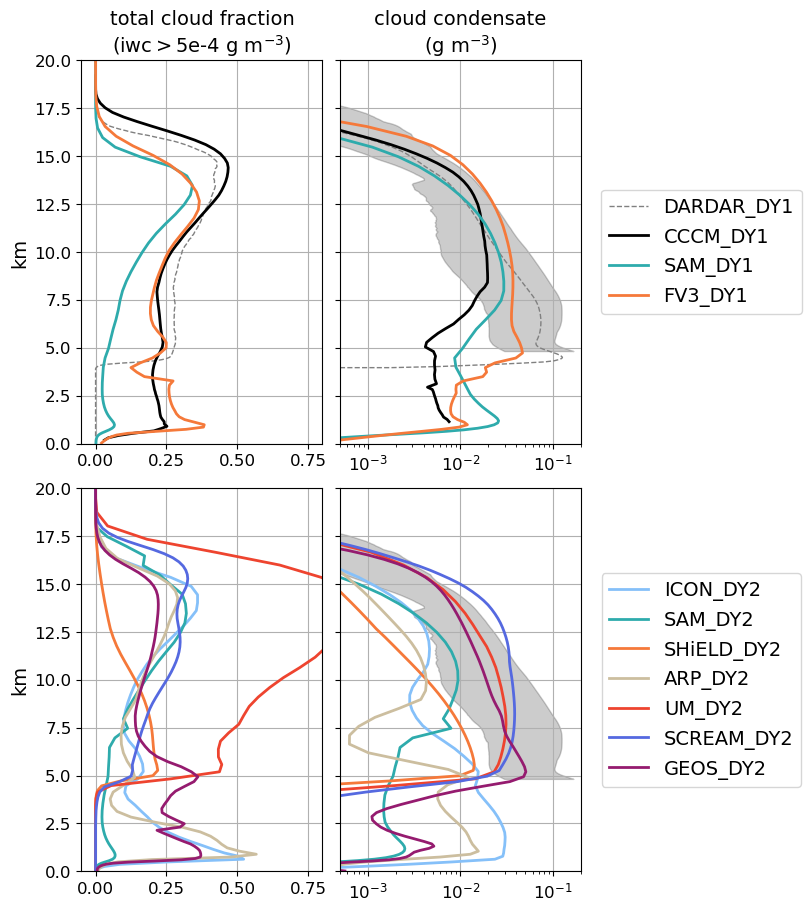

In [4]:
fig, [[ax, axt],[axb, axbt]] = plt.subplots(2,2, figsize=(8,9), constrained_layout=True, sharey=True)
emph="CCCM" # specific which model to emphasize by making the line thicker
models_plotting = ["DARDAR_DY1","CCCM_DY1",
                   "ICON_DY2",
                   "SAM_DY1","SAM_DY2",
                   "FV3_DY1","SHiELD_DY2",
                   "ARP_DY2","UM_DY2", 
                   "SCREAM_DY2", "GEOS_DY2"]
# plot for DY2 models
for i,m in enumerate(models_plotting):
    print(m)
    if (m[:4]=="CCCM"):
        mc = "OBS"
    elif (m[:3]=="DAR"):
        mc = "OBS2"
    else:
        mc=m.split("_")[0]
    lw=1
    if m[:2]=="DA":
        ls="dashed"
        lw=1
    else:
        ls="solid"
        lw=2
    if m[-3:]=="DY1":
        if m[:2]!="IC":
            ax.plot(cl_dict[m], z_dict[m]/1000, color=colors[mc], linestyle=ls, lw=lw)
        axt.plot(cltotal_dict[m]*1000, z_dict[m]/1000, color=colors[mc], label=m, linestyle=ls, lw=lw)
    else:
        axb.plot(cl_dict[m], z_dict[m]/1000, color=colors[mc], linestyle=ls, lw=lw)
        axbt.plot(cltotal_dict[m]*1000, z_dict[m]/1000, color=colors[mc], label=m, linestyle=ls, lw=lw)
# add DARDAR min/max as shaded region
n=80
axt.fill_betweenx((z_dict["DARDAR_DY2"]/1000)[n:], cltotal_dict["DARDAR_DY2low"][n:],cltotal_dict["DARDAR_DY2hgh"][n:],
                 color=colors['OBS'], alpha=0.2)
axbt.fill_betweenx((z_dict["DARDAR_DY2"]/1000)[n:], cltotal_dict["DARDAR_DY2low"][n:],cltotal_dict["DARDAR_DY2hgh"][n:],
                 color=colors['OBS'], alpha=0.2)

# add in the TTL as a shaded region, title, and grid lines
units = "g/kg" if var2=="cltotal" else "g m$^{-3}$"
for axis in [ax, axt, axb, axbt]:
    axis.fill_between([-0.1,1],14,18,color="b",alpha=0.2, label="TTL")
    axis.grid(True)
    axis.tick_params(labelsize=12)


ax.set_title("total cloud fraction", fontsize=14)
axt.set_title("cloud condensate\n({})".format(units), fontsize=14)

# set axis properties
ax.set(xlim=[-0.05,0.8], ylim=[0,20], ylabel="km")
axt.set(xlim=[5e-4,2e-1], xscale="log", ylim=[0, 20])
axb.set(xlim=[-0.05,0.8], ylim=[0,20], ylabel="km")
axbt.set(xlim=[5e-4,2e-1], xscale="log", ylim=[0, 20])

# legend
axt.legend(loc="center", bbox_to_anchor=(1.5, 0.5))
axbt.legend(loc="center", bbox_to_anchor=(1.5,0.5))

# save figure
plt.savefig("../plots/TWP/TWP_3D_{}_{}_dy1v2.png".format(var, var2), dpi=120)
plt.show()

In [ ]:
# cltotal_dict["ICON_DY1"], z_dict["ICON_DY1"].values

## animation of thin cirrus vs deep convection in TWP region over time

In [3]:
plt.rcParams["animation.html"] = "jshtml"
iwp = ap.load_iwp(model, region, total=True, chunks=chunk_dict)
iwp

returned ice + snow + graupel SHiELD TWP


<xarray.DataArray 'iwp' (time: 2880, Xdim: 110626)>
dask.array<open_dataset-089aa357c393e82cd2d850e873c79615iwp, shape=(2880, 110626), dtype=float32, chunksize=(2880, 2400), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-30T00:15:00 ... 2020-02-29
    lon      (Xdim) float32 dask.array<chunksize=(2400,), meta=np.ndarray>
    lat      (Xdim) float32 dask.array<chunksize=(2400,), meta=np.ndarray>
Dimensions without coordinates: Xdim
Attributes:
    standard_name:  atmosphere_mass_content_of_cloud_ice
    long_name:      Vertically Integrated Cloud Ice
    units:          kg m-2
    CDI_grid_type:  unstructured
    cell_methods:   time: point
    origin:         clivi

In [4]:
vmin=1e-4 #kg/m2
vmax=0.1
dc=1

AttributeError: 'PolyCollection' object has no property 'levels'

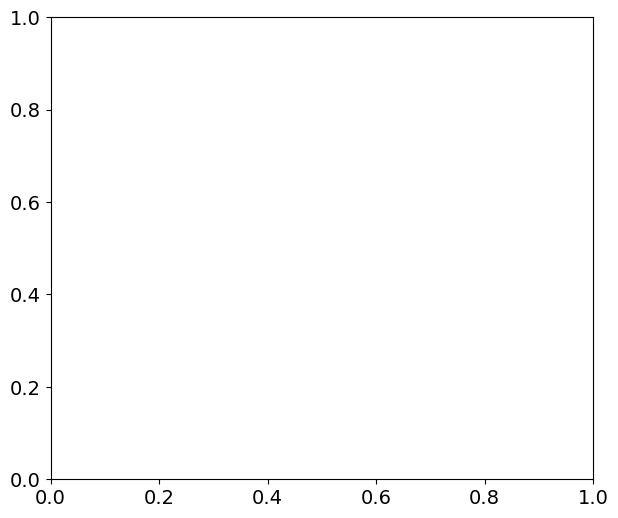

In [42]:
# animation
# Set up Axes with Cartopy Projection
fig, ax = plt.subplots(1,1,figsize=(7,6))
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.coastlines()
# Initialize frame
# im = ax.tripcolor(iwp.lon.values*180/np.pi, iwp.lat.values*180/np.pi,
#                   np.log10(iwp.isel(time=0).values)+3,
#                  shading='flat')
# cbar = plt.colorbar(im, ax=ax, label="IWP (kg/m$^2$)", shrink=0.3)
plt.show()

# misc

In [4]:
ds = xr.open_dataset(ap.TWP+"CERES_SYN1deg-1H_Terra-Aqua-MODIS_Ed4.1_Subset_20200101-20200331.nc").adj_atmos_lw_up_all_toa_1h
ds.mean().values

array(222.83421, dtype=float32)